## Verilog Parser-v2

### Gate Netlist Parser

In [1]:
from pyparsing import *

In [32]:
with open('./verilogs/CSkipA_8bit.rtlbb.v', 'rt') as fh:
    code = fh.read()

In [33]:
# add support for ground input '1'b0'
gnd = Literal("1'b0")
vcc = Literal("1'b1")

In [34]:
# add support for ground input '1'b0'
identifier = Word(alphas+"_", alphanums+"_"+'['+']') | gnd |vcc
input_port = Suppress("input") + delimitedList(identifier) + Suppress(";")
output_port = Suppress("output") + delimitedList(identifier) + Suppress(";")
# wire_list = Suppress("wire") + delimitedList(identifier) + Suppress(";")
# gate_type = oneOf("not and or nand nor xor")
port = Group(Suppress('.') + identifier + Suppress("(") + identifier + Suppress(")"))
gate = Group(identifier + identifier) + Suppress("(") + delimitedList(port) + Suppress(");")

# module_title = Suppress("module") + identifier + Suppress("(") + delimitedList(identifier) + Suppress(");")
# module = module_title + input_port + output_port + Optional(wire_list) + OneOrMore(gate) + Suppress("endmodule")

In [35]:
input_port_list = input_port.searchString(code)
output_port_list = output_port.searchString(code)
gate_list = gate.searchString(code)

In [36]:
len(output_port_list),len(input_port_list),len(gate_list)

(9, 16, 99)

### Standard Cell Library Parser

In [37]:
with open('/usr/local/share/qflow/tech/osu035/osu035_stdcells.v', 'rt') as fh:
    code_std_cells = fh.read()

In [38]:
module_title = Suppress("module") + identifier + Suppress("(") + delimitedList(identifier) + Suppress(");")

In [39]:
module_list = module_title.searchString(code_std_cells)

In [40]:
#Type of gates in the standard cell library
len(module_list)

35

In [41]:
gate_types={}
for i in range(len(module_list)):
#     print(module_list[i][0])
    gate_types[module_list[i][0]] = i+2

In [42]:
gate_types

{'AND2X1': 2,
 'AND2X2': 3,
 'AOI21X1': 4,
 'AOI22X1': 5,
 'BUFX2': 6,
 'BUFX4': 7,
 'CLKBUF1': 8,
 'CLKBUF2': 9,
 'CLKBUF3': 10,
 'DFFNEGX1': 11,
 'DFFPOSX1': 12,
 'DFFSR': 13,
 'FAX1': 14,
 'HAX1': 15,
 'INVX1': 16,
 'INVX2': 17,
 'INVX4': 18,
 'INVX8': 19,
 'LATCH': 20,
 'MUX2X1': 21,
 'NAND2X1': 22,
 'NAND3X1': 23,
 'NOR2X1': 24,
 'NOR3X1': 25,
 'OAI21X1': 26,
 'OAI22X1': 27,
 'OR2X1': 28,
 'OR2X2': 29,
 'PADINC': 30,
 'PADINOUT': 31,
 'PADOUT': 32,
 'TBUFX1': 33,
 'TBUFX2': 34,
 'XNOR2X1': 35,
 'XOR2X1': 36}

### Building Graph Components

In [43]:
gate_dict = {} #gate name mapped to unique integers
gate_type_dict = {}
#define gate types
#input_port = 0
#output_port = 1
#other gates start from 2
node_list = []
edge_list = []

In [44]:
#Add gnd pin at the beginning:
gate_dict["1'b0"] = 0
gate_type_dict[0] = 0
gate_dict["1'b1"] = 1
gate_type_dict[1] = 0
          
#Add input ports to gate_dict and gate_type_dict:
for idx,in_port in enumerate(input_port_list):
    gate_dict[in_port[0]] = idx+2
    gate_type_dict[idx+2] = 0
#     print(idx+1)

#Add gates to gate_dict: position[2] is output
for idx, a_gate in enumerate(gate_list):
#     gate_dict[a_gate[0][1]] = idx + len(input_port_list)
    #print(a_gate)
    gate_dict[a_gate[-1][1]] = idx + len(input_port_list) +2
    gate_type_dict[idx + len(input_port_list)+2] = gate_types[a_gate[0][0]]
#     print(idx + len(input_port_list)+1)



In [45]:
gate_dict, gate_type_dict

({"1'b0": 0,
  "1'b1": 1,
  'i_add_term1[0]': 2,
  'i_add_term1[1]': 3,
  'i_add_term1[2]': 4,
  'i_add_term1[3]': 5,
  'i_add_term1[4]': 6,
  'i_add_term1[5]': 7,
  'i_add_term1[6]': 8,
  'i_add_term1[7]': 9,
  'i_add_term2[0]': 10,
  'i_add_term2[1]': 11,
  'i_add_term2[2]': 12,
  'i_add_term2[3]': 13,
  'i_add_term2[4]': 14,
  'i_add_term2[5]': 15,
  'i_add_term2[6]': 16,
  'i_add_term2[7]': 17,
  '_23_': 18,
  '_17_': 19,
  '_18_': 20,
  '_19_': 21,
  '_1__5_': 22,
  '_3__2_': 23,
  '_27_': 24,
  '_28_': 25,
  '_29_': 26,
  '_30_': 27,
  '_24_': 28,
  '_25_': 29,
  '_26_': 30,
  '_1__6_': 31,
  '_3__3_': 32,
  '_34_': 33,
  '_35_': 34,
  '_36_': 35,
  '_37_': 36,
  '_31_': 37,
  '_32_': 38,
  '_33_': 39,
  '_1__7_': 40,
  '_2_': 41,
  '_41_': 42,
  '_42_': 43,
  '_43_': 44,
  '_44_': 45,
  '_38_': 46,
  '_39_': 47,
  '_40_': 48,
  '_1__0_': 49,
  'rca_inst_w_CARRY_1_': 50,
  '_48_': 51,
  '_49_': 52,
  '_50_': 53,
  '_51_': 54,
  '_45_': 55,
  '_46_': 56,
  '_47_': 57,
  '_1__1_': 

In [46]:
#Add input ports and gates to node_list:
for idx in range(len(gate_dict)):
    node_list.append(idx) 
    
#Add connections to edge_list:
for a_gate in gate_list:
#     print(a_gate[1])
    for connection in a_gate[1:-1]:
        print(connection)
        edge_list.append((gate_dict[connection[1]],gate_dict[a_gate[-1][1]]))
    
existing_length = len(node_list)

#Add output ports to node_list:
for idx,out_port in enumerate(output_port_list):
    gate_type_dict[idx+existing_length] = 1 #gate type is output port
    node_list.append(idx+existing_length)
    edge_list.append((gate_dict[out_port[0]],idx+existing_length))                    
        

['A', '_20_']
['B', '_22_']
['C', '_21_']
['A', 'i_add_term2[5]']
['B', 'i_add_term1[5]']
['A', 'i_add_term2[5]']
['B', 'i_add_term1[5]']
['A', '_17_']
['B', '_18_']
['C', '_3__1_']
['A', '_19_']
['B', '_23_']
['A', '_20_']
['B', '_17_']
['C', '_22_']
['A', '_3__2_']
['A', 'i_add_term2[6]']
['B', 'i_add_term1[6]']
['A', 'i_add_term2[6]']
['B', 'i_add_term1[6]']
['A', '_27_']
['B', '_29_']
['C', '_28_']
['A', 'i_add_term2[6]']
['B', 'i_add_term1[6]']
['A', 'i_add_term2[6]']
['B', 'i_add_term1[6]']
['A', '_24_']
['B', '_25_']
['C', '_3__2_']
['A', '_26_']
['B', '_30_']
['A', '_27_']
['B', '_24_']
['C', '_29_']
['A', '_3__3_']
['A', 'i_add_term2[7]']
['B', 'i_add_term1[7]']
['A', 'i_add_term2[7]']
['B', 'i_add_term1[7]']
['A', '_34_']
['B', '_36_']
['C', '_35_']
['A', 'i_add_term2[7]']
['B', 'i_add_term1[7]']
['A', 'i_add_term2[7]']
['B', 'i_add_term1[7]']
['A', '_31_']
['B', '_32_']
['C', '_3__3_']
['A', '_33_']
['B', '_37_']
['A', '_34_']
['B', '_31_']
['C', '_36_']
['A', "1'b0"]
['A', 

In [47]:
len(node_list),len(edge_list)

(126, 214)

### Build DGL Graph From the Components

In [48]:
import dgl

In [49]:
def build_circuit_graph_undirected():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds():
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

In [50]:
G_directed_sd = build_circuit_graph_directed_sd()
print('We have %d nodes.' % G_directed_sd.number_of_nodes())
print('We have %d edges.' % G_directed_sd.number_of_edges())

We have 126 nodes.
We have 214 edges.


In [51]:
G_undirected = build_circuit_graph_undirected()
print('We have %d nodes.' % G_undirected.number_of_nodes())
print('We have %d edges.' % G_undirected.number_of_edges())

We have 126 nodes.
We have 428 edges.


### Visualize Circuit Graph

In [52]:
node_type = [gate_type_dict[n] for n in node_list]

In [53]:
gate_types2 = dict([(value, key) for key, value in gate_types.items()]) 

In [54]:
gate_types2[0] = 'Input'
gate_types2[1] = 'Output'

In [55]:
gate_type_dict2 = dict([(key, gate_types2[value]) for key, value in gate_type_dict.items()]) 
print(gate_type_dict2)

{0: 'Input', 1: 'Input', 2: 'Input', 3: 'Input', 4: 'Input', 5: 'Input', 6: 'Input', 7: 'Input', 8: 'Input', 9: 'Input', 10: 'Input', 11: 'Input', 12: 'Input', 13: 'Input', 14: 'Input', 15: 'Input', 16: 'Input', 17: 'Input', 18: 'NAND3X1', 19: 'NOR2X1', 20: 'AND2X2', 21: 'OAI21X1', 22: 'NAND2X1', 23: 'OAI21X1', 24: 'INVX1', 25: 'OR2X2', 26: 'NAND2X1', 27: 'NAND3X1', 28: 'NOR2X1', 29: 'AND2X2', 30: 'OAI21X1', 31: 'NAND2X1', 32: 'OAI21X1', 33: 'INVX1', 34: 'OR2X2', 35: 'NAND2X1', 36: 'NAND3X1', 37: 'NOR2X1', 38: 'AND2X2', 39: 'OAI21X1', 40: 'NAND2X1', 41: 'OAI21X1', 42: 'INVX1', 43: 'OR2X2', 44: 'NAND2X1', 45: 'NAND3X1', 46: 'NOR2X1', 47: 'AND2X2', 48: 'OAI21X1', 49: 'NAND2X1', 50: 'OAI21X1', 51: 'INVX1', 52: 'OR2X2', 53: 'NAND2X1', 54: 'NAND3X1', 55: 'NOR2X1', 56: 'AND2X2', 57: 'OAI21X1', 58: 'NAND2X1', 59: 'OAI21X1', 60: 'INVX1', 61: 'OR2X2', 62: 'NAND2X1', 63: 'NAND3X1', 64: 'NOR2X1', 65: 'AND2X2', 66: 'OAI21X1', 67: 'NAND2X1', 68: 'OAI21X1', 69: 'INVX1', 70: 'OR2X2', 71: 'NAND2X1', 7

In [56]:
node_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125]

### Directed Graph

In [57]:
%matplotlib inline

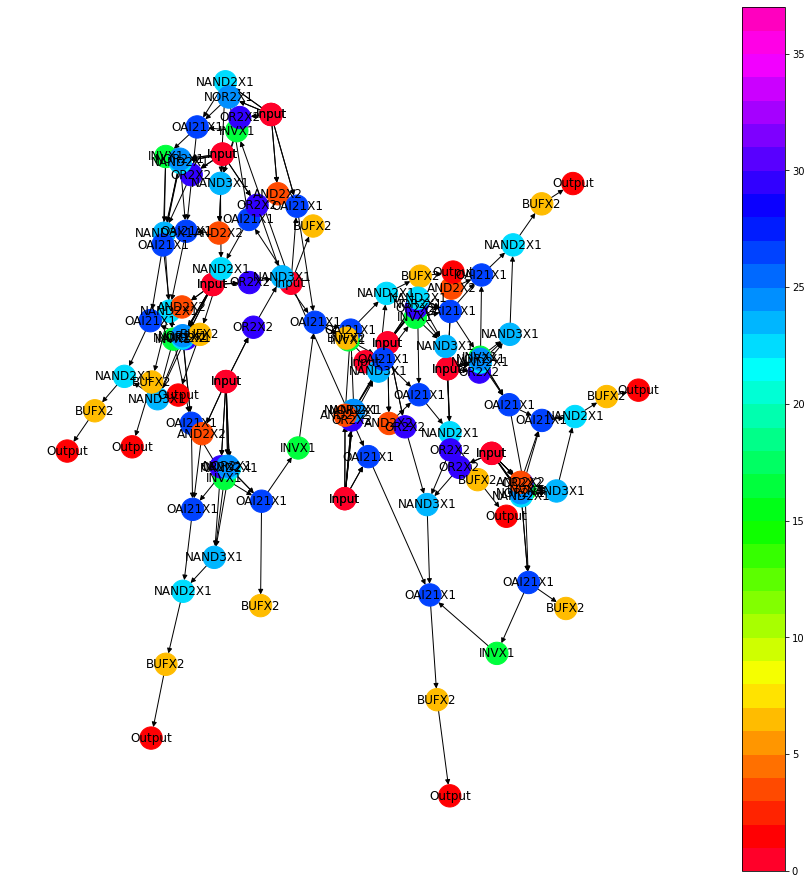

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
nx_G_directed_sd = G_directed_sd.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G_directed_sd)
plt.figure(1,figsize=(12,12))
cmap = plt.get_cmap('gist_rainbow',len(gate_types)+2)
# cmap.set_under('gray')
vmin = 0
vmax = 37
nx.draw(nx_G_directed_sd,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
# plt.savefig('c432_undirected.png')
nx.draw_networkx_labels(nx_G_directed_sd,pos,labels=gate_type_dict2)
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
cm._A = []
plt.colorbar(cm)

### Undirected Graph

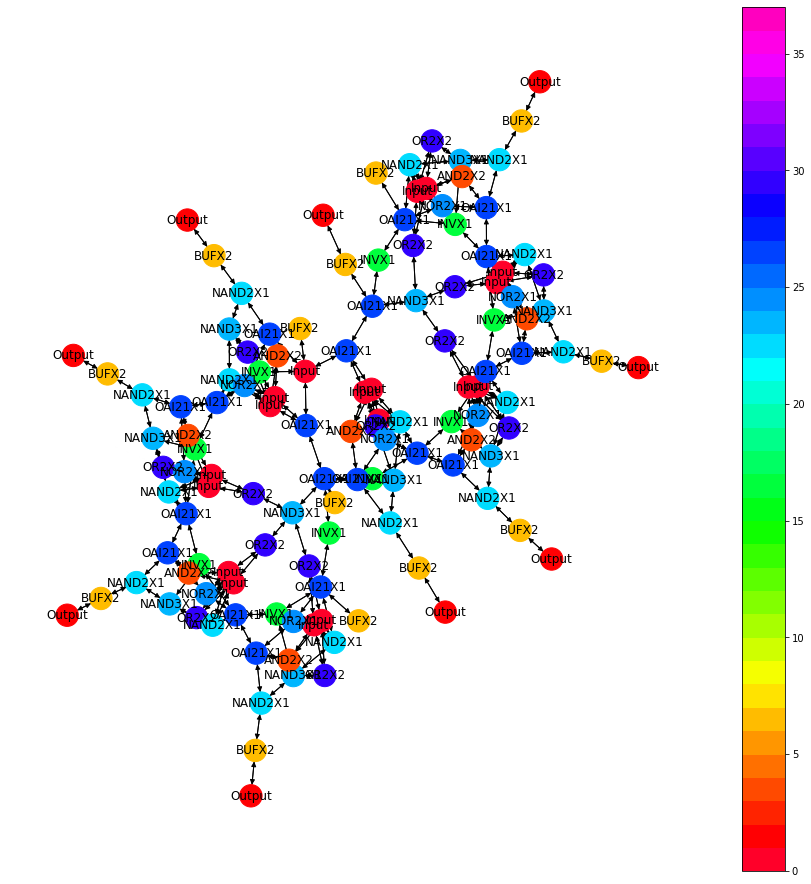

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
nx_G_undirected = G_undirected.to_networkx()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G_undirected)
plt.figure(1,figsize=(12,12))
cmap = plt.get_cmap('gist_rainbow',len(gate_types)+2)
# cmap.set_under('gray')
vmin = 0
vmax = 37
nx.draw(nx_G_undirected,pos,with_labels=False,node_size=500,font_size=14,node_color=node_type,cmap=cmap,vmin = vmin,vmax=vmax)
# plt.savefig('c432_undirected.png')
nx.draw_networkx_labels(nx_G_undirected,pos,labels=gate_type_dict2)
cm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
cm._A = []
plt.colorbar(cm)

## End